# <font style="color:blue">Assignment: Implement a CNN for Image Classification on CIFAR10 dataset</font>

We have seen how to implement a CNN (LeNet5 and LeNet with the batch norm) in the last section. We used MNIST and Fashion MNIST dataset which are grayscale or single channel datasets. In this assignment, you will implement a CNN Model ( similar to LeNet ) for classifying objects in the `CIFAR10` dataset.

The CIFAR10 dataset has the following properties
1. It has `10` classes.  
1. It has colored images, so it has `3-channels`.
1. The image shape is `32 x 32`.

Samples of CIFAR10- dataset ([source](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html?highlight=cifar)):

<img src="https://www.learnopencv.com/wp-content/uploads/2020/01/c3_w3_cirar10.png" width=700>


# <font color='blue'>Marking Scheme</font>

### <font style="color:green">Maximum Points: 30

<div>
    <table>
        <tr><td><h3>Sr. no.</h3></td> <td><h3>Problem</h3></td> <td><h3>Points</h3></td> </tr>
        <tr><td><h3>1</h3></td> <td><h3>Implement the CNN Model</h3></td> <td><h3>10</h3></td> </tr>
        <tr><td><h3>2</h3></td> <td><h3>Find Mean and Std of Training Data</h3></td> <td><h3>5</h3></td> </tr>
        <tr><td><h3>3</h3></td> <td><h3>Model Training & Accuracy</h3></td> <td><h3>15</h3></td> </tr>
    </table>
</div>


# <font color='blue'>Problem Description</font>

### <font color='blue'>1. Implement the CNN Model</font>
Since the task is to classify objects in a dataset of color images, you need to implement a CNN with 10 output classes. **Also, your model must use `Conv2d`, `BatchNorm2d`, and `ReLU`.**

**You need to define the model architecture in the function: `MyModel` ( Step 1 )**

Hint: For color images you need to use an input shape that is different than the ones we have been using till now, so that it accepts 3 channel inputs.

### <font color='blue'>2. Find Mean and Std of Training Data</font>

It is a good practice to normalize the training data. To normalize the data, we need to compute mean and std. As the dataset has colored images, it has `3-channel` (RGB or BGR). We have to find mean and std per channel using training data.

**You need to compute the mean and std for the dataset in the function: `get_mean_std_train_data` ( Step 3 )**

### <font color='blue'>3. Model Training and Accuracy</font>

Once you have defined the model, you can train it. To get better accuracy, you need to play around the training configuration **( Step 5 )** and even the model architecture. You can check the accuracy by running the training loop in `Step 11`.

Here are a few hints on how you can improve the accuracy:
- Train for longer duration
- Try with different learning rate
- Try to add more convolutional layers to the architecture
- Try to add more nodes in the layers.

You need to achieve **75% accuracy** ( See Step11 ) in order to get full marks for this part.

**You do not need to implement anything for this, just changing the parameters as mentioned above and running the Notebook will give you the accuracy. ( Step 5 and Step 11 )**

Note that this notebook requires you to change a few stuff in the model to get the desired accuracy. Therefore you need train the model all over again (which seems to be time-consuming).   

You can choose to execute this notebook in Google-Colab so that you have access to a GPU-machine and prototype faster.   

Once the desired results are acheived, you can copy-paste the changes made in the Colab-notebook to this notebook so that the grading occurs on the latest code. We recommend to download your trained model checkpoint and upload with filename `cifar10_cnn_model.pt` under `models` directory in the labs.

You can access the Colab-notebook from [here](https://colab.research.google.com/drive/18lgSRmHPagJkB0xmDq5ZiWGkuWcHnUc2?usp=sharing)

Note that this notebook requires you to change a few stuff in the model to get the desired accuracy. Therefore you need train the model all over again (which seems to be time-consuming).   

You can choose to execute this notebook in Google-Colab so that you have access to a GPU-machine and prototype faster.   

Once the desired results are acheived, you can copy-paste the changes made in the Colab-notebook to this notebook so that the grading occurs on the latest code. We recommend to download your trained model checkpoint and upload with filename `cifar10_cnn_model.pt` under `models` directory in the labs.

You can access the Colab-notebook from [here](https://colab.research.google.com/drive/18lgSRmHPagJkB0xmDq5ZiWGkuWcHnUc2?usp=sharing)

In [166]:
required_training = True

In [167]:
%matplotlib inline

In [168]:
import matplotlib.pyplot as plt  # one of the best graphics library for python

In [169]:
import os
import time

from typing import Iterable
from dataclasses import dataclass

import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

from torchvision import datasets, transforms
import torchvision

# <font style="color:blue">1. CNN Model Architecture [30 Points]</font>

You have to write the model code here. I have provided an example of the LeNet Model for your reference that you can edit. In general, it is good practice to break your system into pieces. In this case, the self._body piece defines the feature detection piece of the system and the self._head defines the classifier piece. Finally, forward defines the forward pass.

Notes on what to change in the model, you will need to change the input so that it works with color images with three input channels.

Your model should achieve at least 75% accuracy. If you do not get higher accuracy, here are a few hints:
- Try to add more convolutional layers to the architecture
- Try to add more nodes in the layers.


In [170]:
class LeNet5(nn.Module):
    def __init__(self, num_classes, batch_norm=False):
        super().__init__()

        # convolution layers

        if batch_norm:
            self._body = nn.Sequential(
                # First convolution Layer
                # input size = (32, 32), output size = (28, 28)
                nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5),
                nn.BatchNorm2d(6),
                # ReLU activation
                nn.ReLU(inplace=True),
                # Max pool 2-d
                nn.MaxPool2d(kernel_size=2),

                # Second convolution layer
                # input size = (14, 14), output size = (10, 10)
                nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5),
                nn.BatchNorm2d(16),
                nn.ReLU(inplace=True),
                nn.MaxPool2d(kernel_size=2),
                # output size = (5, 5)
            )


        else:
            self._body = nn.Sequential(
                # First convolution Layer
                # input size = (32, 32), output size = (28, 28)
                nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5),
                # ReLU activation
                nn.ReLU(inplace=True),
                # Max pool 2-d
                nn.MaxPool2d(kernel_size=2),

                # Second convolution layer
                # input size = (14, 14), output size = (10, 10)
                nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5),
                nn.ReLU(inplace=True),
                nn.MaxPool2d(kernel_size=2),
                # output size = (5, 5)
            )

        # Fully connected layers
        self._head = nn.Sequential(
            # First fully connected layer
            # in_features = total number of weights in last conv layer = 16 * 5 * 5
            nn.Linear(in_features=16 * 5 * 5, out_features=120),

            # ReLU activation
            nn.ReLU(inplace=True),

            # second fully connected layer
            # in_features = output of last linear layer = 120
            nn.Linear(in_features=120, out_features=84),

            # ReLU activation
            nn.ReLU(inplace=True),

            # Third fully connected layer. It is also output layer
            # in_features = output of last linear layer = 84
            # and out_features = number of classes = 10 (MNIST data 0-9)
            nn.Linear(in_features=84, out_features=num_classes)
        )

    def forward(self, x):
        # apply feature extractor
        x = self._body(x)
        # flatten the output of conv layers
        # dimension should be batch_size * number_of weights_in_last conv_layer
        x = x.view(x.shape[0], -1)
        # apply classification head
        x = self._head(x)
        return x


You will construct your model in this block. Make sure that you properly set the number of input channels!

In [171]:
class UpdateModel(nn.Module):
    def __init__(self):
        super().__init__()

        self._body = nn.Sequential(
            # First convolution Layer(s?)
            # input size = (32, 32), output size = (32, 32)
            nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding="same"),
            nn.BatchNorm2d(16),

            # ReLU activation
            nn.ReLU(),
            # Max pool 2-d
            nn.MaxPool2d(kernel_size=2),

            # Add in more convolution layers as needed, keep track of the sizes!
            nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(inplace=True),

            nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(inplace=True),

            nn.Conv2d(16, 32, kernel_size=3, stride=2, padding=0),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),

            nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),

            # output size should be = (32, 7, 7)
            )
        self._head = nn.Sequential(
            # First fully connected layer
            # in_features = total number of weights in last conv layer = 32 * 7 * 7
            nn.Linear(in_features=32 * 7 * 7, out_features=84),

            # ReLU activation
            nn.ReLU(inplace=True),

            # you can vary the number of fully connected layers and their sizes!
            # As long as you end up with 10 output features!
            nn.Linear(in_features=84, out_features=10)
        )

    def forward(self, x):
        # apply feature extractor
        x = self._body(x)
        # flatten the output of conv layers
        # dimension should be batch_size * number_of weights_in_last conv_layer
        x = x.view(x.shape[0], -1)
        # apply classification head
        x = self._head(x)

        return x

In [172]:
import torch
import torch.nn as nn

class MyModel(nn.Module):
    def __init__(self):
        super().__init__()

        self._body = nn.Sequential(
            # One convolution layer
            # Input: (3, 32, 32)
            # Output: (16, 32, 32)
            nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding="same"),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)  # halves size to (16, 16, 16)
        )

        self._head = nn.Sequential(
            # Flattened features: 16 * 16 * 16 = 4096
            nn.Linear(in_features=16 * 16 * 16, out_features=84),
            nn.ReLU(inplace=True),
            nn.Linear(in_features=84, out_features=10)
        )

    def forward(self, x):
        x = self._body(x)
        x = x.view(x.shape[0], -1)  # flatten
        x = self._head(x)
        return x


# <font style="color:blue">2. Display the Network</font>

In [173]:
# from torchsummary import summary

# model = MyModel().to("cpu")
# print("UPDATED MODEL STATISTICS:")
# original = OriginalModel().to("cpu")
# summary(model, (3, 32, 32), device="cpu")
# print("\nORIGINAL MODEL STATISTICS:")
# summary(original, (3, 32, 32), device="cpu")

In [174]:
my_model = MyModel()
print(my_model)

MyModel(
  (_body): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (_head): Sequential(
    (0): Linear(in_features=4096, out_features=84, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=84, out_features=10, bias=True)
  )
)


In [175]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [176]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [177]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [178]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


# <font style="color:blue">3. Find Mean and STD of CIFAR10 Data [5 Points]</font>

Function **`get_mean_std_train_data`** should `return` `mean` and `std` of training data. You can refer to the code used in the previous section for finding the mean and std of the training data.



In [179]:
def get_mean_std_train_data(data_root):

    train_transform = transforms.Compose([transforms.ToTensor()])
    train_set = datasets.CIFAR10(root=data_root, train=True, download=True, transform=train_transform)

    # return mean (numpy.ndarray) and std (numpy.ndarray)
    mean = np.array([0.0, 0.0, 0.0])
    mean2 = np.array([0.0, 0.0, 0.0])
    count = 0
    for i in train_set:
      m = torch.mean(i[0], (1,2))
      m2 = torch.mean(i[0]*i[0], (1,2))
      mean += m.numpy()
      mean2 += m2.numpy()
      count +=1
    mean /= count
    std = np.sqrt(mean2 / count - mean * mean)


    return mean, std

In [180]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [181]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [182]:
def get_data(batch_size, data_root, num_workers=1):


    try:
        mean, std = get_mean_std_train_data(data_root)
        assert len(mean) == len(std) == 3
    except:
        mean = np.array([0.5, 0.5, 0.5])
        std = np.array([0.5, 0.5, 0.5])


    train_test_transforms = transforms.Compose([
        # this re-scale image tensor values between 0-1. image_tensor /= 255
        transforms.ToTensor(),
        # subtract mean and divide by variance.
        transforms.Normalize(mean, std)
    ])

    # train dataloader
    train_loader = torch.utils.data.DataLoader(
        datasets.CIFAR10(root=data_root, train=True, download=True, transform=train_test_transforms),
        batch_size=batch_size,
        shuffle=True,
        num_workers=num_workers,
        pin_memory = True
    )

    # test dataloader
    test_loader = torch.utils.data.DataLoader(
        datasets.CIFAR10(root=data_root, train=False, download=True, transform=train_test_transforms),
        batch_size=batch_size,
        shuffle=False,
        num_workers=num_workers,
        pin_memory = True
    )
    return train_loader, test_loader

# <font style="color:blue">4. System Configuration</font>


In [183]:
@dataclass
class SystemConfiguration:
    '''
    Describes the common system setting needed for reproducible training
    '''
    seed: int = 42  # seed number to set the state of all random number generators
    cudnn_benchmark_enabled: bool = True  # enable CuDNN benchmark for the sake of performance
    cudnn_deterministic: bool = True  # make cudnn deterministic (reproducible training)

# <font style="color:blue">5. Training Configuration [15 Points]</font>
All training parameters are defined here. So,
This is where you can improve your accuracy, apart from improving the architecture.

Here are a few hints on how you can improve the accuracy:
- Train for longer duration
- Try with different learning rate

**You need to achieve 75% accuracy in order to get full marks for this part.**

**You will see the effect of these changes when you run Step 11**

In [184]:
@dataclass
class TrainingConfiguration:
    '''
    Describes configuration of the training process
    '''


    log_interval: int = 1000  # how many batches to wait between logging training status
    test_interval: int = 1  # how many epochs to wait before another test. Set to 1 to get val loss at each epoch
    data_root: str = "../data"  # folder to save data
    num_workers: int = 10  # number of concurrent processes using to prepare data
    device: str = 'cuda'  # device to use for training.
    # update changed parameters in below coding block.
    # Please do not change "data_root"
    batch_size: int = 8  # amount of data to pass through the network at each forward-backward iteration
    epochs_count: int = 12  # number of times the whole dataset will be passed through the network
    learning_rate: float = 0.005  # determines the speed of network's weights update

# <font style="color:blue">6. System Setup</font>


In [185]:
def setup_system(system_config: SystemConfiguration) -> None:
    torch.manual_seed(system_config.seed)
    if torch.cuda.is_available():
        torch.backends.cudnn_benchmark_enabled = system_config.cudnn_benchmark_enabled
        torch.backends.cudnn.deterministic = system_config.cudnn_deterministic

# <font style="color:blue">7. Training</font>
We are familiar with the training pipeline used in PyTorch. The following steps are performed in the code below:

1. Send the data to the required device ( CPU/GPU )
1. Make a forward pass using the forward method.
1. Find the loss using the Cross_Entropy function.
1. Find the gradients using the backward function.
1. Update the weights using the optimizer.
1. Find the accuracy of the model

Repeat the above for the specified number of epochs.

In [186]:
def train(
    train_config: TrainingConfiguration, model: nn.Module, optimizer: torch.optim.Optimizer,
    train_loader: torch.utils.data.DataLoader, epoch_idx: int
) -> None:

    # change model in training mood
    model.train()

    # to get batch loss
    batch_loss = np.array([])

    # to get batch accuracy
    batch_acc = np.array([])

    for batch_idx, (data, target) in enumerate(train_loader):

        # clone target
        indx_target = target.clone()
        # send data to device (its is medatory if GPU has to be used)
        data = data.to(train_config.device)
        # send target to device
        target = target.to(train_config.device)

        # reset parameters gradient to zero
        optimizer.zero_grad()

        # forward pass to the model
        output = model(data)

        # cross entropy loss
        loss = F.cross_entropy(output, target)

        # find gradients w.r.t training parameters
        loss.backward()
        # Update parameters using gardients
        optimizer.step()

        batch_loss = np.append(batch_loss, [loss.item()])

        # Score to probability using softmax
        prob = F.softmax(output, dim=1)

        # get the index of the max probability
        pred = prob.data.max(dim=1)[1]

        # correct prediction
        correct = pred.cpu().eq(indx_target).sum()

        # accuracy
        acc = float(correct) / float(len(data))

        batch_acc = np.append(batch_acc, [acc])

        if batch_idx % train_config.log_interval == 0 and batch_idx > 0:
            print(
                'Train Epoch: {} [{}/{}] Loss: {:.6f} Acc: {:.4f}'.format(
                    epoch_idx, batch_idx * len(data), len(train_loader.dataset), loss.item(), acc
                )
            )

    epoch_loss = batch_loss.mean()
    epoch_acc = batch_acc.mean()
    return epoch_loss, epoch_acc

# <font style="color:blue">8. Validation</font>

After every few epochs **`validation`** will be called with the `trained model` and `test_loader` to get validation loss and accuracy.

In [187]:
def validate(
    train_config: TrainingConfiguration,
    model: nn.Module,
    test_loader: torch.utils.data.DataLoader,
) -> float:
    model.eval()
    test_loss = 0
    count_corect_predictions = 0
    for data, target in test_loader:
        indx_target = target.clone()
        data = data.to(train_config.device)

        target = target.to(train_config.device)

        output = model(data)
        # add loss for each mini batch
        test_loss += F.cross_entropy(output, target).item()

        # Score to probability using softmax
        prob = F.softmax(output, dim=1)

        # get the index of the max probability
        pred = prob.data.max(dim=1)[1]

        # add correct prediction count
        count_corect_predictions += pred.cpu().eq(indx_target).sum()

    # average over number of mini-batches
    test_loss = test_loss / len(test_loader)

    # average over number of dataset
    accuracy = 100. * count_corect_predictions / len(test_loader.dataset)

    print(
        '\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
            test_loss, count_corect_predictions, len(test_loader.dataset), accuracy
        )
    )
    return test_loss, accuracy/100.0

# <font style="color:blue">9. Saving the Model</font>

In [188]:
def save_model(model, device, model_dir='models', model_file_name='cifar10_cnn_model.pt'):


    if not os.path.exists(model_dir):
        os.makedirs(model_dir)

    model_path = os.path.join(model_dir, model_file_name)

    # make sure you transfer the model to cpu.
    if device == 'cuda':
        model.to('cpu')

    # save the state_dict
    if int(torch.__version__.split('.')[1]) >= 6:
        torch.save(model.state_dict(), model_path, _use_new_zipfile_serialization=False)

    else:
        torch.save(model.state_dict(), model_path)

    if device == 'cuda':
        model.to('cuda')

    return

# <font style="color:blue">10. Main</font>

In this section of code, we use the configuration parameters defined above and start the training. Here are the important actions being taken in the code below:

1. Set up system parameters like CPU/GPU, number of threads etc
1. Load the data using dataloaders
1. Create an instance of the LeNet model
1. Specify optimizer to use.
1. Set up variables to track loss and accuracy and start training.
1. If loss decreases, saving the model

In [189]:
def main(system_configuration=SystemConfiguration(), training_configuration=TrainingConfiguration()):

    # system configuration
    setup_system(system_configuration)

    # batch size
    batch_size_to_set = training_configuration.batch_size
    # num_workers
    num_workers_to_set = training_configuration.num_workers
    # epochs
    epoch_num_to_set = training_configuration.epochs_count

    # if GPU is available use training config,
    # else lowers batch_size, num_workers and epochs count
    if torch.cuda.is_available():
        device = "cuda"
    else:
        device = "cpu"
        num_workers_to_set = 2

    # data loader
    train_loader, test_loader = get_data(
        batch_size=training_configuration.batch_size,
        data_root=training_configuration.data_root,
        num_workers=num_workers_to_set
    )

    # Update training configuration
    training_configuration = TrainingConfiguration(
        device=device,
        num_workers=num_workers_to_set
    )

    # initiate model
    model = MyModel()

    # send model to device (GPU/CPU)
    model.to(training_configuration.device)

    # optimizer
    optimizer = optim.SGD(
        model.parameters(),
        lr=training_configuration.learning_rate
    )

    # Learning rate scheduler
    # Decrease learning rate by a factor of 0.1 every 10 epochs
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)


    best_loss = torch.tensor(np.inf)
    best_accuracy = torch.tensor(0)

    # epoch train/test loss
    epoch_train_loss = np.array([])
    epoch_test_loss = np.array([])

    # epch train/test accuracy
    epoch_train_acc = np.array([])
    epoch_test_acc = np.array([])

    # trainig time measurement
    t_begin = time.time()
    for epoch in range(training_configuration.epochs_count):

        train_loss, train_acc = train(training_configuration, model, optimizer, train_loader, epoch)

        epoch_train_loss = np.append(epoch_train_loss, [train_loss])

        epoch_train_acc = np.append(epoch_train_acc, [train_acc])

        elapsed_time = time.time() - t_begin
        speed_epoch = elapsed_time / (epoch + 1)
        speed_batch = speed_epoch / len(train_loader)
        eta = speed_epoch * training_configuration.epochs_count - elapsed_time

        print(
            "Elapsed {:.2f}s, {:.2f} s/epoch, {:.2f} s/batch, ets {:.2f}s".format(
                elapsed_time, speed_epoch, speed_batch, eta
            )
        )

        if epoch % training_configuration.test_interval == 0:
            current_loss, current_accuracy = validate(training_configuration, model, test_loader)

            epoch_test_loss = np.append(epoch_test_loss, [current_loss])

            epoch_test_acc = np.append(epoch_test_acc, [current_accuracy])

            if current_loss < best_loss:
                best_loss = current_loss

            if current_accuracy > best_accuracy:
                best_accuracy = current_accuracy
                print('Accuracy improved, saving the model.\n')
                save_model(model, device)

        # Step the learning rate scheduler
        scheduler.step()


    print("Total time: {:.2f}, Best Loss: {:.3f}, Best Accuracy: {:.3f}".format(time.time() - t_begin, best_loss,
                                                                                best_accuracy))

    return model, epoch_train_loss, epoch_train_acc, epoch_test_loss, epoch_test_acc

In [190]:
# @title
###
### AUTOGRADER TEST - DO NOT REMOVE
###


# <font style="color:blue">Step 11: Start Training</font>
This is where you start the training. You may see that the training does not converge or does not give a good accuracy. You need to change
- In Step 1: the network architecture and add a few more layers or more nodes to the already existing layers
- In Step 5: training parameters such as learning rate or batch_size or epochs so that the network converges or run the network for longer so that it gets more time to fit the data

**You need to make sure that the accuracy at the end is at least 75%.**

In [191]:
if required_training:
    model, epoch_train_loss, epoch_train_acc, epoch_test_loss, epoch_test_acc = main()

Train Epoch: 0 [8000/50000] Loss: 1.074223 Acc: 0.7500
Train Epoch: 0 [16000/50000] Loss: 1.255643 Acc: 0.5000
Train Epoch: 0 [24000/50000] Loss: 1.293366 Acc: 0.5000
Train Epoch: 0 [32000/50000] Loss: 1.244684 Acc: 0.5000
Train Epoch: 0 [40000/50000] Loss: 0.839913 Acc: 0.7500
Train Epoch: 0 [48000/50000] Loss: 0.843768 Acc: 0.8750
Elapsed 15.97s, 15.97 s/epoch, 0.00 s/batch, ets 175.65s

Test set: Average loss: 1.2093, Accuracy: 5728/10000 (57%)

Accuracy improved, saving the model.

Train Epoch: 1 [8000/50000] Loss: 1.340301 Acc: 0.2500
Train Epoch: 1 [16000/50000] Loss: 1.002101 Acc: 0.7500
Train Epoch: 1 [24000/50000] Loss: 0.602808 Acc: 0.8750
Train Epoch: 1 [32000/50000] Loss: 0.951155 Acc: 0.7500
Train Epoch: 1 [40000/50000] Loss: 1.932841 Acc: 0.5000
Train Epoch: 1 [48000/50000] Loss: 1.156556 Acc: 0.5000
Elapsed 34.11s, 17.06 s/epoch, 0.00 s/batch, ets 170.56s

Test set: Average loss: 1.1131, Accuracy: 6101/10000 (61%)

Accuracy improved, saving the model.

Train Epoch: 2 [80

# <font style="color:blue">12. Plot Loss</font>

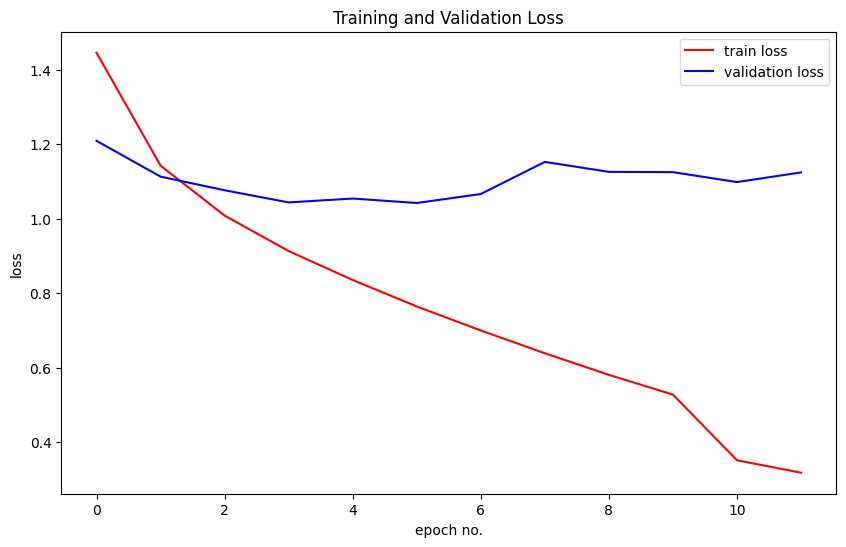

In [192]:
# Plot loss
plt.rcParams["figure.figsize"] = (10, 6)
x = range(len(epoch_train_loss))


plt.figure
plt.plot(x, epoch_train_loss, color='r', label="train loss")
plt.plot(x, epoch_test_loss, color='b', label="validation loss")
plt.xlabel('epoch no.')
plt.ylabel('loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# <font style="color:blue">13. Plot Accuracy</font>

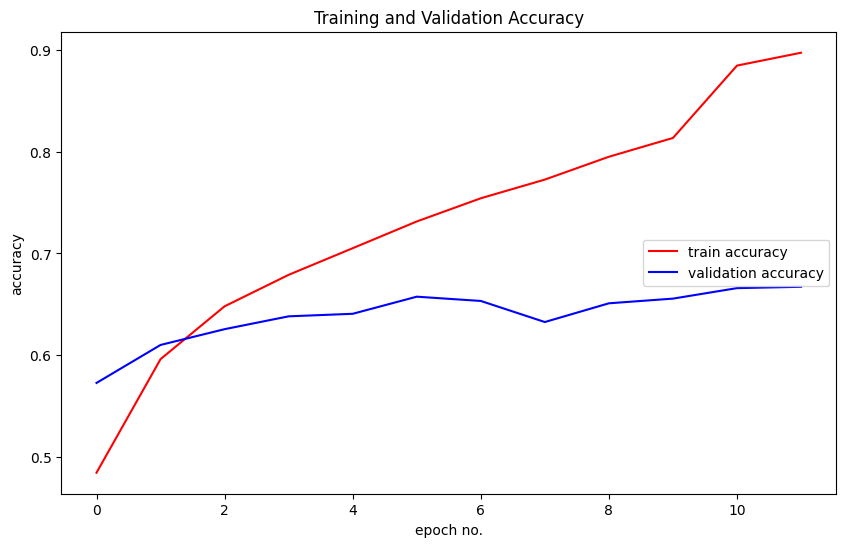

In [193]:
# Plot loss
plt.rcParams["figure.figsize"] = (10, 6)
x = range(len(epoch_train_loss))


plt.figure
plt.plot(x, epoch_train_acc, color='r', label="train accuracy")
plt.plot(x, epoch_test_acc, color='b', label="validation accuracy")
plt.xlabel('epoch no.')
plt.ylabel('accuracy')
plt.legend(loc='center right')
plt.title('Training and Validation Accuracy')
plt.show()

# <font style="color:blue">14. Loading the Model </font>


In [194]:
# initialize the model
cnn_model = MyModel()

models = 'models'

model_file_name = 'cifar10_cnn_model.pt'

model_path = os.path.join(models, model_file_name)

# loading the model and getting model parameters by using load_state_dict
cnn_model.load_state_dict(torch.load(model_path))

<All keys matched successfully>

# <font style="color:blue">15. Model Prediction</font>


In [195]:
def prediction(model, train_config, batch_input):

    # send model to cpu/cuda according to your system configuration
    model.to(train_config.device)

    # it is important to do model.eval() before prediction
    model.eval()

    data = batch_input.to(train_config.device)

    output = model(data)

    # Score to probability using softmax
    prob = F.softmax(output, dim=1)

    # get the max probability
    pred_prob = prob.data.max(dim=1)[0]

    # get the index of the max probability
    pred_index = prob.data.max(dim=1)[1]

    return pred_index.cpu().numpy(), pred_prob.cpu().numpy()

# <font style="color:blue">16. Perform Inference on sample images </font>

For prediction, we need to transform the data in the same way as we have done during training.

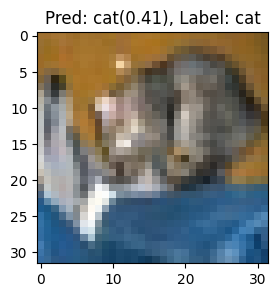

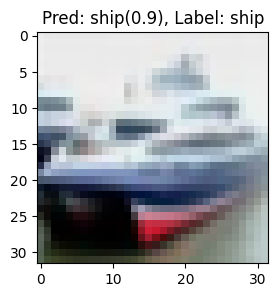

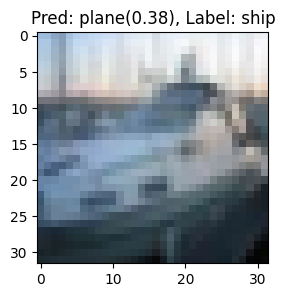

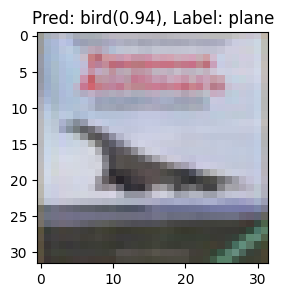

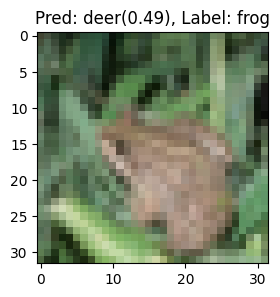

In [196]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

batch_size = 5
train_config = TrainingConfiguration()

if torch.cuda.is_available():
    train_config.device = "cuda"
else:
    train_config.device = "cpu"



# load test data without image transformation
test = torch.utils.data.DataLoader(
    datasets.CIFAR10(root=train_config.data_root, train=False, download=False,
                   transform=transforms.functional.to_tensor),
    batch_size=batch_size,
    shuffle=False,
    num_workers=1
    )

try:
    mean, std = get_mean_std_train_data(data_root)
    assert len(mean) == len(std) == 3
except:
    mean = (0.5, 0.5, 0.5)
    std = (0.5, 0.5, 0.5)

# load testdata with image transformation
image_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
    ])

test_trans = torch.utils.data.DataLoader(
    datasets.CIFAR10(root=train_config.data_root, train=False, download=False, transform=image_transforms),
    batch_size=batch_size,
    shuffle=False,
    num_workers=1
    )

for data, _ in test_trans:
    # pass the loaded model
    pred, prob = prediction(cnn_model, train_config, data)
    break


plt.rcParams["figure.figsize"] = (3, 3)
for images, label in test:
    for i, img in enumerate(images):
        img = transforms.functional.to_pil_image(img)
        plt.imshow(img)
        plt.gca().set_title('Pred: {0}({1:0.2}), Label: {2}'.format(classes[pred[i]], prob[i], classes[label[i]]))
        plt.show()
    break

# <font style="color:blue">17. Analysis Questions [20 points]
QUestion 1: What was the best accuracy that you got on the test set? What approaches did you try to improve your results? Make a table of your original model parameters and record your results, then start changing your model to improve results by adding in layers and processing, different learning rates, training longer, etc. Comment on which changes gave the most performance improvements versus the size of the network. The optimizer is restricted to the standard SGD operator for this case.

Question 2 What categories of images were identified most accurately? Which categories were confused with each other more often? Use your results  Speculate on why some categories of image were more difficult to work with.

Question 3 Is the system overfit? Support your answer.



Q1:
This was the best-performing model:
```
Test set: Average loss: 0.7182, Accuracy: 7626/10000 (76%)

Total time: 368.14, Best Loss: 0.714, Best Accuracy: 0.763

```
The original model contained a single convolutional layer, pooling, then a fully connected layer head.

To modify this, I added more convolutional layers, and more normalization.

Specifically, I added more Conv-BN-Relu layers. The effect of more stacked convolutional layers helps the model to build a hierarchy of features, going from general and small, to major and shape-specific as the network continues. For example, the earlier layers might learn in edges or textures, while the layer ones learn complex shapes.

I also added batch normalization (BatchNorm2d). By doing this, the model balances the outputs for each layer. This helps to minimize exploding or vanishing gradients.



# <font style="color:blue">18. Quiz Questions (10 pts)
1.   The input image size is (28, 28, 3) (colored image with RGB channel), and there is a convolutional layer with 8 filters whose kernel size is (3, 3) with no bias. What is the total number of weight parameters in the convolutional layer?
2.   Which of the following operations have learnable parameters? ReLU, Convolution 2D, Max Pooling, Batch Norm?
3.   Consider the input
\begin{bmatrix}
    X_{11}  & X_{12} & X_{13} \\X_{21}  & X_{22} & X_{23} \\X_{31}  & X_{32} & X_{33}\end{bmatrix}

and the given kernel as:
\begin{bmatrix}
    K_{11}  & K_{12}\\K_{21}  & K_{22}\end{bmatrix}

In the convolution operation which of the listed inputs will contribute to the gradient update of weight $K_{22}$ without padding? $X_{12}, X_{13},X_{22},X_{32}$?

4.   Which of the following statements is true regarding max pooling in a CNN?

a.   Max pooling layers increase the depth of the feature maps.

b.   Max pooling is differentiable, and its gradient can be easily computed during backpropagation.

  c.  Max pooling is a technique used to normalize the feature maps.

  d.  Max pooling can provide a form of translation invariance to the network.




# <font style="color:blue">References</font>

1. https://pytorch.org/tutorials/beginner/data_loading_tutorial.html
1. https://pytorch.org/tutorials/beginner/saving_loading_models.html

In [197]:
## Github management commands
%%bash


UsageError: %%bash is a cell magic, but the cell body is empty.
